### 아이디어
- `가가두`란 애칭이 존재하는 웰노운 문제. 어쩌다보니 태그를 스포당해버렸다. 기하, 스위핑, 분할정복.
- 문제는 $O(N \log N)$ 쯤에 풀릴 것으로 보인다. 어떻게 해야 할지 생각해보자.
  - 한 점 $A$ 를 잡고 또 다른 점 $B$ 를 잡고 $\overline {AB}$ 의 길이를 $d = dx^2 + dy^2$ 라고 하자. \
  만약 $A$ 에서 거리를 절반씩 줄일 수 있을까? 매번 거리가 절반씩 줄어들게 하는 점을 빠르게 찾을 수 있다면, 한 점당 가가두의 후보를 $O(\log N)$ 에 찾을 수 있을 것 같다.
    - 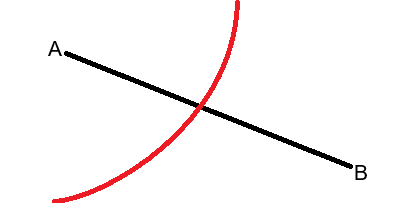\
    그림이 개떡같지만, 대충 $\frac {\overline {AB}}{2}$ 를 반지름으로 하는 원의 내부에서, 아무 점 하나라도 빠르게 찾을 수 있다면 된다는 뜻이다.
    - 뭔가.. 안될 것 같다. 두 점의 길이는 계산되지 않았으니, 좌표를 기준으로 거리를 판단해야한다.\
    예를들어 $dx^2 + dy^2 = d$ 라고 했는데, 그렇다면 다음 좌표쌍 $d'x, d'y$ 를 찾을 때 무엇 먼저 봐야한다는 뜻인가? \
    $d'x$ 가 몇 이였든, $d'y$ 를 보기 전까지는 그게 절반보다 가까운 점인지 알 수 없다.\
    $x$ 와 $d'x$ 와 $d'y$ 의 비율(대충 삼각함수를 적당히 써서)을 기준으로 어떤 criteria을 만들고, \
    그걸 $A$ 로부터 적용시켜 $O(\log N)$ 에 쿼리할 수 있는 자료구조가 존재한다?\
    있다고 해도 이건 내 능력 외이다. 존재하는지도 모르겠다.
  - 이번엔 거꾸로 임의의 한 점 $A$ 를 잡고, 나머지 점과의 거리를 전부 재보는 $O(N)$ 스캔을 수행한 뒤,\
  더 짧은 거리를 만들 수 있는 다음 스캔 후보 점 $A'$ 를 찾는 과정을 $O(\log N)$ 번만 반복하는 방법은 어떨까?
    - 우선, $A$ 로부터 가장 가까운 점과 가장 먼 점이 뭔지와, 그 거리를 알 수 있다. 그 두 점을 일단 $I, B$ 라고 해보자.
    - 목표는 길이가 $\overline {AI}$ 이하인 쌍을 찾는 것.
    - 문제의 정답은 반드시 $\overline {AB}$ 를 반지름으로 하는 원 안에 있다. 
      - (증명) 그 바깥에 정답이 존재한다고 해보자. \
      그런데, 원 밖에 있다는 뜻은 그 점이 $B$ 보다 더 멀리있다는 뜻이다. \
      그럼 $B$ 의 정의에 따라 모순. 또한, 어떤 점도 원 바깥에 존재할 수 없다.
    - 이제 절반씩 줄일 방법이 있어야 한다.
    - 뭔가.. 의도한 풀이는 아닌 것 같은데, $A$ 로부터의 특수한 삼각함수로 유도한 criteria를 구해서, \
    그 차이가 가장 적은 점들끼리의 거리를 구하는 방법으로 $O(N)$ 만에 문제를 풀어버릴 방법을 생각해버렸다.\
    정해를 풀고 나서 만약 가능한지 확인해봐야겠다.
    - 좀 더 생각해봤지만, 그럴싸한 방법이 떠오르지 않는다.
  

### 풀이
- https://casterian.net/algo-prob/boj2261.html
  - 이쪽 풀이에서, 좀 더 알고리즘의 패턴적인 분석을 추가한 풀이
- 점에 번호를 메겼다고 했을 때, 매번 길이가 $n$ 인 구간 내의 점의 개수가 절반이 되도록 나누는 pivot을 내릴 수 있다. 이 pivot을 $p$ 라 하자.
  - 참고로, 이 $p$ 는 기하학적 경계가 아닌, 점의 번호를 기준으로 나누는 경계여야 한다. \
  그래야 기저 상태에 올바르게 도달할 수 있기 때문이다. 아래 참고\
  만약 $p$ 를 평면상에서 내렸고, 그 위에 점이 잔뜩 모여있는 케이스가 있다고 한들, 매번 점의 개수는 절반씩 나뉘어들어야 한다.
- 그렇다면 가장 가까운 점의 쌍 $A, B$ 에 더 낮은 번호의 점을 보고 $A$ 라고 할 때, 총 세 가지 경우가 나온다.
  - 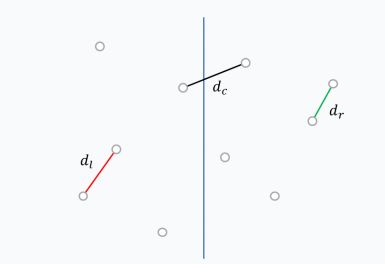
    1. $A, B$ 모두 $p$ 보다 왼편에 존재하는 경우
    2. $A, B$ 모두 $p$ 보다 오른편에 존재하는 경우
    3. $p$ 를 기준으로 $A$ 는 왼편에, $B$ 는 오른편에 존재하는 경우
  - 1, 2, 3의 해를 각각 $d_l, d_r, d_m$ 이라고 하자.
  - 구간 내에서의 정답은 $\min(d_l, d_r, d_m)$ 이 될 것이다.
- $d_l, d_r$ 은 재귀적으로 답이 구해진다. 
  - 구간을 절반씩 나누다보면 필연히 구간의 길이가 2 혹은 3 인 경우에 도달하게 된다. (또한 문제에서 $N > 1$ 이다)
    - 만약 구간을 올바르게 나누지 않았다면, 길이가 1인 구간에 도달할 수도 있다. 이는 잘못 푸는거니 주의.
  - 구간의 길이가 2인 경우: 두 점의 거리가 가장 가까운 거리이다.
  - 구간의 길이가 3인 경우: 세 점의 거리를 모두 구해봤을 때, 그 중 가장 가까운 거리가 답이다.
  - 매 step마다 구간이 절반씩 나눠지므로, 총 $n \log n$ 개의 구간이 생긴다.\
  그리고 기저 상태인 길이 2, 3 에서는 답을 $O(1)$ 에 구할 수 있으므로, $O(n \log n)$ 만큼의 시간이 걸린다.
- $d_m$ 은 정의상 왼편에서 하나, 오른편에서 하나를 이어야 한다.
  - 이를 naive하게 구할 경우 왼편에 $n \over 2$, 오른편에 $n \over 2$ 개 있으니, 매 step마다 $\frac {n}{2} \cdot \frac {n}{2} = \frac {n^2}{4}$ 번의 연산이 필요하다. \
  이 과정이 $O(n^2)$ 를 사용하게 되므로, naive하게 구할 순 없다.
  - 그렇다면 시간을 줄일 방법을 찾아야 하는데, 필요없는 쌍들을 보지 않아야 할 것이다. \
  그 단서로 $d_l$ 과 $d_r$ 를 이용할 수 있다.
- $d = \min(d_l, d_r)$ 이라고 해보자. \
$d_m$ 을 찾는 과정에서, $p$ 로부터 $x$ 축의 차이가 $d$ 보다 큰 점들은 무시해도 된다.
  - 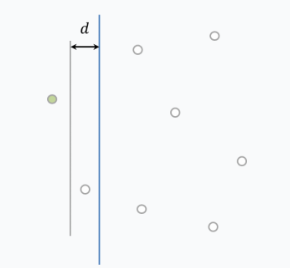
    - (증명) 그렇지 않다고 하자. 즉, $d$ 보다 $x$ 축에서 더 멀리 떨어진 점을 골라야만 $d_m$ 을 구할 수 있다고 하자.
    - $d_m$ 의 정의상, $p$ 의 왼쪽에서 점을 골랐다면, 그 쌍은 $p$ 를 넘어 오른쪽에서 찾아야 한다.
    - 이는 적어도(혹은, $y$ 축의 차이를 보지 않더라도), $x$ 축의 차이 만큼이 $d'$ 에 기여된다는 뜻이다.
    - 그런데, 더 멀리 떨어진 점을 골랐으므로, 오른쪽의 어떤 점을 고르든 $x$ 축의 차이만으로 $d$ 를 넘어서게 된다.
    - 그렇다면 애초에 최솟값이 아닌 것을 보게 되는 것과 같다.
    - 일반성을 잃지 않고 왼쪽과 오른쪽을 바꿔도 동일하다.
    - 그러므로 $x$ 축에서 $d$ 보다  더 멀리 떨어진 점에서 $d_m$ 을 구할 수 없다.
  - 이를 통해 매번 $d$ 보다 가까이에 존재하는 점들만 볼 수 있다. 그 점의 개수를 각각 $n_l, n_r$ 이라 하자.
  - 영역 내부의 점을 살펴보는 것은 한 step당 $O(n_ln_r)$ 만큼 걸린다. 
  - 그런데, $d$ 가 너무 크게 잡히거나, 점들이 한 $x$ 좌표 기준으로 몰려버리면, $O(n^2)$ 과 다를바가 없어진다. 추가적인 방법이 필요하다.

- 여기서 스위핑이 나온다. $p$ 를 기준으로 $x$ 축이 $d$ 만큼 떨어진, 기하학적 구역 안에서 스위핑을 시도할 수 있다.
  - 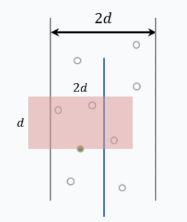
  - 우선 y좌표를 기준으로 정렬한다. 
  - 그리고 제일 아래에서 자기보다 더 위에있는 점, 즉 $y$ 좌표가 같거나 더 큰 점들을 살펴볼 것이다.
  - 이 때, 위에있는 모든 점들을 살펴본다면 $n + (n-1) + (n-2) + \cdots = \frac {n^2}{2}$ 번 볼테니, 또 다시 $O(n^2)$ 이 걸릴 수 있다.
  - 하지만 한 점 위로 $y$ 좌표가 $d$ 이상인 점을 볼 필요가 없다. 증명은 위와 비슷하다.
  - 또한, 좌우로도 $d$ 이상 떨어진 점들은 볼 필요가 없다. 이 역시 증명은 위와 비슷하다.
  - 따라서 매 스위핑 step마다, 한정된 구간(그림에서의 빨간 구역)만 살펴보면 된다.
  - 그리고 그 한정된 구간에서 살펴볼 점의 개수는 적으니 상수로 취급해도 된다.
    - (적은 증거) 문제에 정의에 의해 각 좌표가 정수로 주어진다.
    - 만약 좌표 위에 여러개의 좌표가 주어지면 그 때의 답은 고민할 필요 없이 0이다. 
    - 살펴볼 점을 $a$ 라고 하자. $a$ 살펴볼 `한정된 구간은` $d \cdot 2d$ 공간위에 정수로 이루어진 점이 존재할 수 있는 경우의 수와 같다.
    - 이 공간이 충분히 작음을 직관적으로 알 수 있다.
    - [그게 7번을 넘지 않는다고 하는데](https://people.csail.mit.edu/indyk/6.838-old/handouts/lec17.pdf), 정확한 숫자까지 보일 필요는 없는 것 같다. 충분히 작다는 것만 보이면 문제를 풀 수 있다.

### 추가
- 분할 정복으로 접근한다는 것은 패턴적으로 보면 히트로그램에서 가장 큰 직사각형을 떠올려야 했었던 것 같다.\
병합정렬이랑 퀵정렬이 지금 머릿속에 잘 안들어와 있던게 풀이를 못떠올린 이유가 아닐까 싶다.
  - 다음에 $O(N \log N)$ 의 풀이법을 떠올려야 한다면, 가운데에 pivot을 두는 분할 정복방식을 떠올려보자.
- 추가로 off-by-one으로 주의해야할 점. 구간 $[l, r]$ 에 대한 분할정복 함수를 설계할 때, 구간의 길이 $n = r - l + 1$ 이고, 이 구간을 순회한다고 해보자. 다음은 모두 같다
  - `i in range(l, r+1)`
  - `i in range(l, l+n)`
  - `i in range(n): k = l + i`
  - 이 중에서 실수로 1을 더하거나 빼는 등의 실수를 한다면 off-by-one이다. 그냥 외워야 할 것 같다.
    - 아예 이참에 디버깅 문서에 off-by-one 문단을 따로 적어야겠다.